# Imports and utility code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
class Experiment:
  def run():
    pass

  def run_multiple(self, n_runs):
    df = pd.DataFrame([self.run() for _ in range(n_runs)])
    return df

  def plot(self):
    outcomes = self.run_multiple(100000)
    if len(outcomes.columns) != 1:
      outcomes = outcomes.apply(lambda x: ', '.join([str(a) for a in x]), axis=1)
    outcomes.value_counts(normalize=True).sort_index().plot(kind='bar')
    plt.show()


class CoinToss(Experiment):
  def __init__(self, p_head):
    self.p_head = p_head

  def run(self):
    return np.random.rand() < self.p_head


class DiceRoll(Experiment):
  def __init__(self, n_sides, probs):
    self.n_sides = n_sides
    self.probs = probs
    if abs(np.sum(probs) - 1) > 1e-3:
      raise ValueError('Probabilities must sum to 1')
    if len(probs) != n_sides:
      raise ValueError('Number of sides must match number of probabilities')

  def run(self):
    return np.random.choice(range(1, self.n_sides + 1), p=self.probs)


class MultipleExperiment(Experiment):
  def __init__(self, experiments):
    self.experiments = experiments

  def run(self):
    results = []
    for experiment in self.experiments:
      results.append(experiment.run())
    return results

class SumOfCoinToss(MultipleExperiment):
  def __init__(self, n_coins, n_heads=None):
    self.n_coins = n_coins
    if n_heads is None:
      self.n_heads = [0.5] * n_coins
    else:
      self.n_heads = n_heads
    self.experiments = [CoinToss(p_head) for p_head in self.n_heads]
    super().__init__(self.experiments)

  def run(self):
    results = super().run()
    return sum(results)


class GameCoinToss(MultipleExperiment):
  def __init__(self, n_coins, n_heads=None):
    self.n_coins = n_coins
    if n_heads is None:
      self.n_heads = [0.5] * n_coins
    else:
      self.n_heads = n_heads
    self.experiments = [CoinToss(p_head) for p_head in self.n_heads]
    super().__init__(self.experiments)

  def run(self):
    results = super().run()
    return 2*sum(results) - len(results)


# Probability
- Frequentist view: Probability is the frequency of occurrence of an outcome

$$
  P(A) = \frac{\text{Occurrence of Event A}}{\text{Total Experiments}}
$$

- Bayesian view: Probability is the belief of occurrence of an outcome

$$
P(A) = x : 0 \le x \le 1
$$


## Example: Frequentist view

In [4]:
p_head = 0.45
n_experiment = 10000

coss_toss_experiment = CoinToss(p_head)
df = coss_toss_experiment.run_multiple(n_experiment)
df.columns = ['Outcome']
df.head()

,Outcome
0,True
1,False
2,False
3,False
4,True


In [5]:
n_heads = df[df['Outcome']].shape[0]

estimated_p_head = n_heads / n_experiment

estimated_p_head

0.4582

In [6]:
p_head - estimated_p_head

-0.008199999999999985

## Example: Bayesian view




### Conditional Probability

When you have some belief, you can update the belief in lieu of new information, this is given by conditional probability.

Conditional Probability is defined as below:
$$
  P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

$P(A)$ is called Prior belief and $P(A|B)$ is called Posterior belief


### Independence of Events

Two events $A$ and $B$ are considered independent if
$$
P(A \cap B) = P(A) P(B)
$$

### Maximum Likelihood Principle

It says that, the belief of occurrence of outcome should such that it maximizes the probability of observing the data


Let $D$ be the data from the experiment runs and $P(A) = θ$ be the probability of observing an outcome. Then MLP says that

$$
\theta = \arg\max_{\theta}{P(D)}
$$

In our coin toss example, let $P(H) = \theta$ and $n$ be number of experiments. Given the data, we observed heads $k$ times i.e. $k$ be occurrence of event

$$
P(D) = P(C_1 \cap C_2  ... \cap C_n)
$$

Since each coin toss are independent of each other

$$
P(D) = P(C_1) P(C_2) ... P(C_n)
$$

$$
P(D) = \theta^k (1 - \theta)^{n - k}
$$

According to MLP, we need to maximize $P(D)$,

$$
\frac{d}{d\theta}P(D) = 0
$$

$$
\frac{d}{d\theta}\theta^k (1 - \theta)^{n - k} = 0
$$

$$
k\theta^{k-1} (1 - \theta)^{n - k} - (n-k)\theta^k (1 - \theta)^{n - k-1} = 0
$$

$$
k(1 - \theta) - (n-k)\theta = 0
$$

$$
k - n\theta = 0
$$

$$
\theta = \frac{k}{n}
$$

Hence, we can say that,

$$
  P(A) = \frac{\text{Occurrence of Event A}}{\text{Total Experiments}}
$$


In [7]:
k = df[df['Outcome']].shape[0]

theta = k / n_experiment

theta

0.4582

## Acitvity: [Kaggle Titanic Dataset](https://www.kaggle.com/competitions/titanic/data)

The Titanic dataset is a classic and beginner-friendly dataset used for data science and machine learning practice. It contains information about passengers aboard the Titanic, and the goal is to predict survival based on features like age, sex, class, fare, and more.


### Column Description

| Column        | Description                                                  |
|---------------|--------------------------------------------------------------|
| PassengerId   | Unique ID for each passenger                                 |
| Survived      | Survival (0 = No, 1 = Yes)                                   |
| Pclass        | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                     |
| Name          | Full name of the passenger                                   |
| Sex           | Gender (male/female)                                         |
| Age           | Age in years                                                 |
| SibSp         | Number of siblings or spouses aboard                         |
| Parch         | Number of parents or children aboard                         |
| Ticket        | Ticket number                                                |
| Fare          | Fare paid for the ticket                                     |
| Cabin         | Cabin number (many missing values)                           |
| Embarked      | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |



In [8]:
#Load the dataset
titanic_df = pd.read_csv('./data/titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Calculate probability of survival
p_survived = titanic_df[titanic_df['Survived'] == 1].shape[0] / titanic_df.shape[0]

p_survived

0.3838383838383838

In [10]:
#Calculate probability of survival given gender
p_survived_given_gender = titanic_df.groupby('Sex')['Survived'].mean()

p_survived_given_gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
#Calculate probability of survival given passenger class
p_survived_given_class = titanic_df.groupby('Pclass')['Survived'].mean()

p_survived_given_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [12]:
#Calculate probability of survival given class and gender
p_survived_given_class_gender = titanic_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

p_survived_given_class_gender

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


# Distributions

For coin toss or those survived, we only have 2 outcomes. Hence, knowing probability of one of the outcome is enough.

Generally, if number of outcomes are $n$, we need to know $n-1$ probabilities, and if the number of outcomes are continous (e.g. predicting age of random person on titanic), it becomes impossible to list down all probabilities.

Hence, we introduce a concept called Probability Distribution.

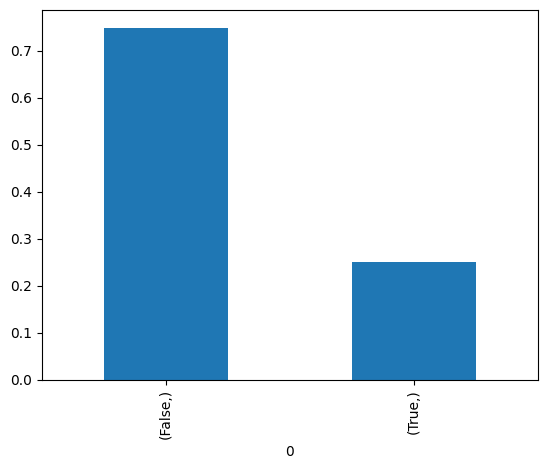

In [13]:
coss_toss_experiment = CoinToss(0.25)
coss_toss_experiment.plot()

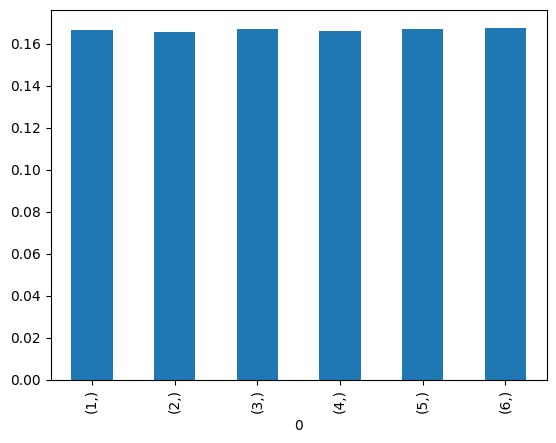

In [14]:
dice_experiment = DiceRoll(6, [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
dice_experiment.plot()

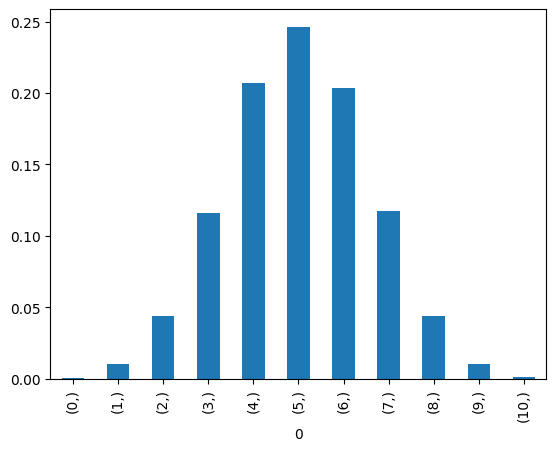

In [15]:
n_coin_toss = 10
sum_of_coin_toss = SumOfCoinToss(n_coin_toss)
sum_of_coin_toss.plot()

## Mathematical representation of distributions

Distribution are functions defined on sample space (precisely, random variables), such that it provides the probability of outcome $x$.

It is called Probability density function(pdf) for continous $x$, and Probability Mass Function(pmf) for discrete $x$. We will represent it by $f_X$

- Uniform distribution

$$
  \text{Given } k > 0,
$$

$$
f_X(x) = k
$$

- Normal distribution

$$
  \text{Given mean } \mu, \text{ std } \sigma,  
$$

$$
f_X(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}
$$

 - Interesting property of normal distribution is 95% of it values lie in 2 standard deviation span from mean i.e.
$$ (\mu - 2\sigma, \mu + 2\sigma) $$


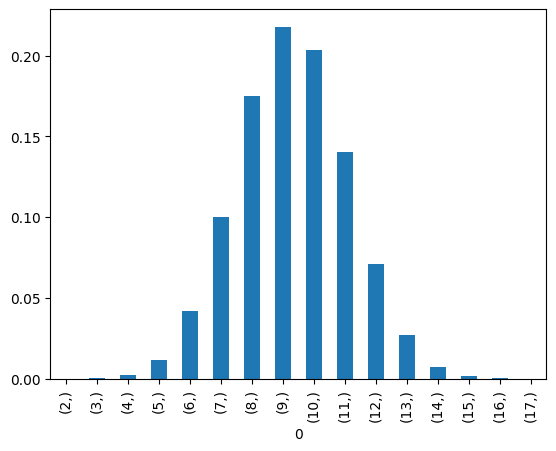

In [16]:
n_coin_toss = 20
probs = [np.random.rand() for _ in range(n_coin_toss)]
sum_of_coin_toss = SumOfCoinToss(n_coin_toss, probs)
sum_of_coin_toss.plot()

## Acivitiy: Titanic Dataset - Distribution of Age and Fare of passengers

<Axes: >

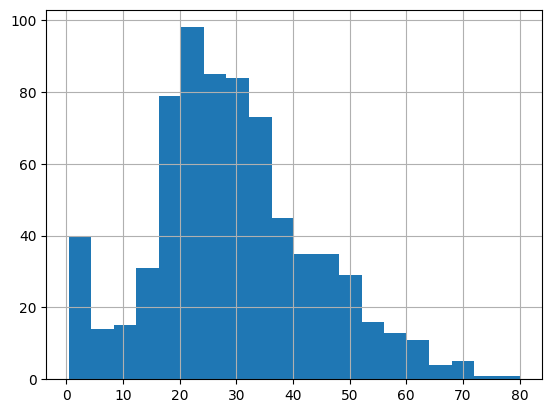

In [17]:
titanic_df['Age'].hist(bins=20)

In [18]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

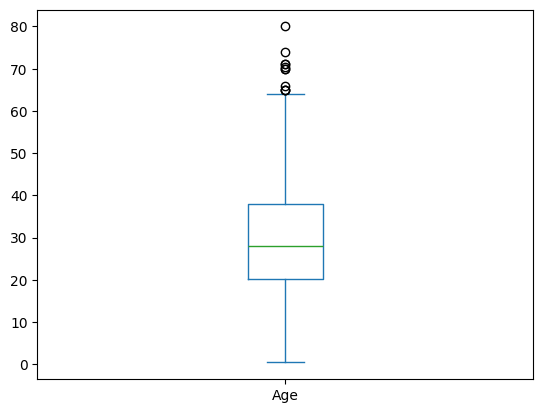

In [19]:
titanic_df['Age'].plot(kind='box')

<Axes: >

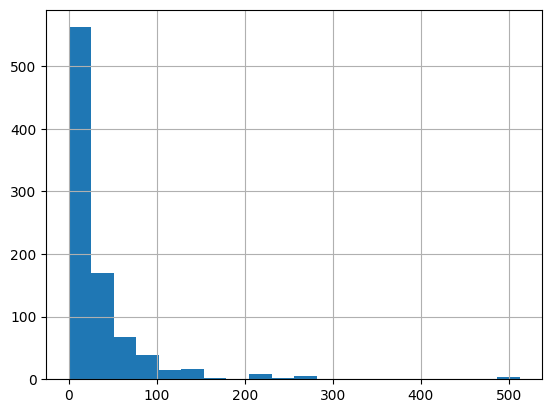

In [20]:
titanic_df['Fare'].hist(bins=20)

<Axes: >

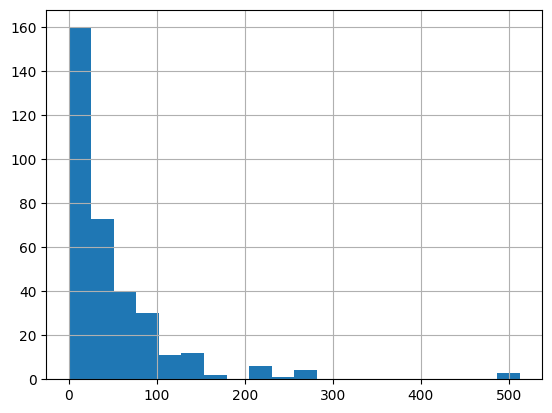

In [21]:
#Plot age distribution of those who survived
titanic_df[titanic_df['Survived'] == 1]['Fare'].hist(bins=20)

<Axes: >

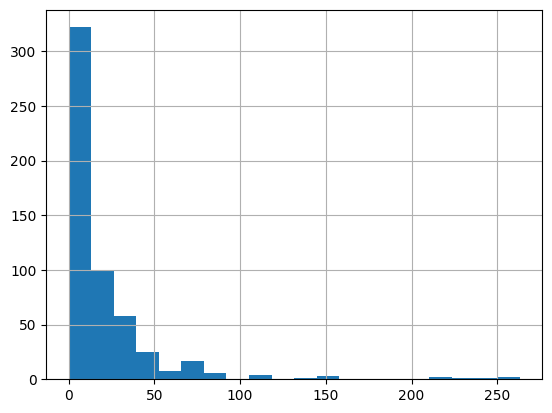

In [22]:
#Plot age distribution of those who did not survive
titanic_df[titanic_df['Survived'] == 0]['Fare'].hist(bins=20)

# Confidence Intervals

### Population vs. Sample
Population: Entire universe of objects we are interested in

Sample: A subset of objects obtained randomly from the population

Examples:
- Average household income of Texas
  - Population: All residents of Texas
  - Sample: Randomly selected 1000 residents of Texas

- Effect of a new vaccine
  - Population: All human beings
  - Sample: 100 volunteers for the study



### True effect vs. Estimation
For a property of interest, if the property is calculated on entire population, it is called True property i.e. $p$ whereas if it is calculated for the sample, it is called Estimated or Empirical property i.e. $\hat{p}$ or $p_{estimated}$

Generally, we do not have liberty to access the population, hence we rely on the sample to estimated property extrapolate it to the population.

## Example: Coin Toss Game

Game rules:
- The host will toss 100 coins
- For every head, you get \$1 else you will lose \$1
- You have not idea whether coins are baised or unbaised

#### What Host knows

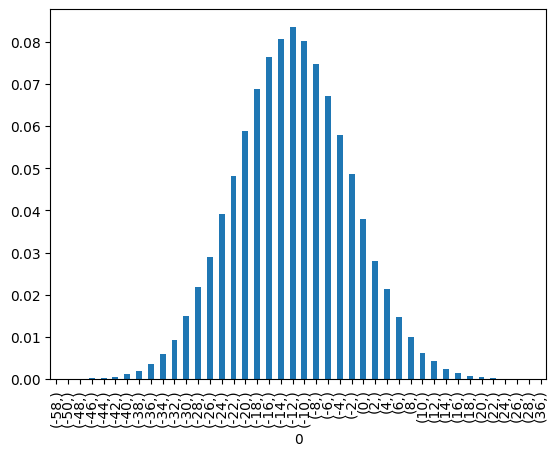

In [23]:
n_coin_toss = 100
probs = [0.40] * 90 + [0.8] * 10
game = GameCoinToss(n_coin_toss, probs)
game.plot()

In [24]:
outcomes = game.run_multiple(10000)
true_mean = np.mean(outcomes)
true_mean

np.float64(-11.933)

#### What you know

In [25]:
n_samples = 10
sample = game.run_multiple(n_samples)
estimated_mean = np.mean(sample)
estimated_mean

np.float64(-12.4)

## Thought experiment

Let's say you can watch the $n$ game of other players for 1000 days, you can visualize the distribution for the mean payout of $n$ games of each day

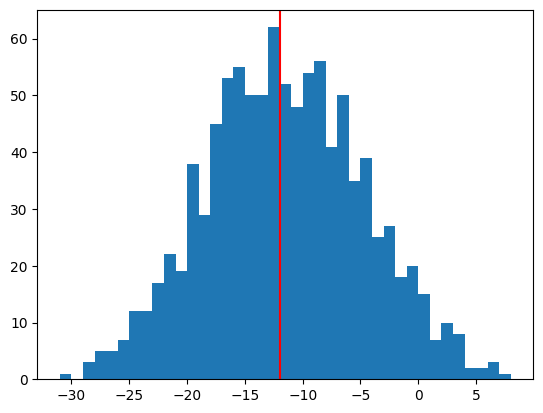

In [26]:
estimated_means = []
for _ in range(1000):
  sample = game.run_multiple(2).values
  estimated_means.append(np.mean(sample))

plt.hist(estimated_means, bins=range(int(true_mean) - 20,int(true_mean) + 20, 1))
plt.axvline(true_mean, color='r')
plt.show()

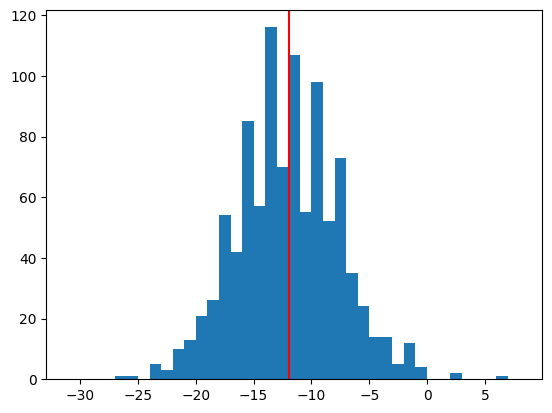

In [27]:
estimated_means = []
for _ in range(1000):
  sample = game.run_multiple(5).values
  estimated_means.append(np.mean(sample))

plt.hist(estimated_means, bins=range(int(true_mean) - 20,int(true_mean) + 20, 1))
plt.axvline(true_mean, color='r')
plt.show()

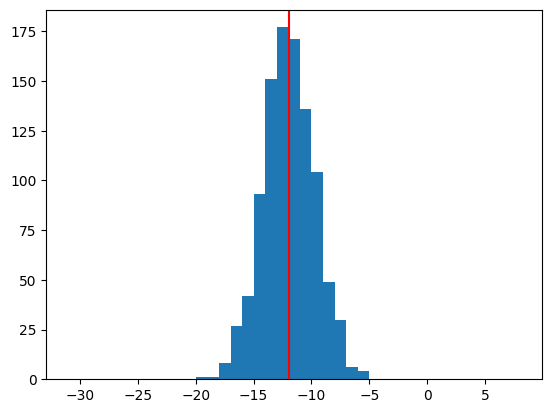

In [28]:
estimated_means = []
for _ in range(1000):
  sample = game.run_multiple(20)
  estimated_means.append(np.mean(sample))

plt.hist(estimated_means, bins=range(int(true_mean) - 20,int(true_mean) + 20, 1))
plt.axvline(true_mean, color='r')
plt.show()

**NOTE:** This observation that distribution of estimated means follows a normal distribution is called **Centeral Limit Theorem**

One of the direct consequence of **Central Limit Theorem** is **Law of Large Numbers** i.e. As the sample size $n$ increases, estimated mean $\mu_{estimated}$ tends to same as true mean $\mu$

#### Deriving relationship between $\sigma_{sampling\_dist}$ and $\sigma_{estimated}$

In [29]:
sample_info = []
for i in range(5,100,5):
  estimated_means = []
  estimated_stds = []
  for _ in range(1000):
    sample = game.run_multiple(i)
    estimated_means.append(np.mean(sample))
    estimated_stds.append(np.std(sample))

  sample_dist_mean = np.mean(estimated_means)
  sample_dist_std = np.std(estimated_stds)
  sample_info.append((i, sample_dist_mean, sample_dist_std, np.mean([std / sample_dist_std for std in estimated_stds])))

sample_info = pd.DataFrame(sample_info, columns=['n', 'mean', 'std', 'ratio'])
sample_info


/Users/avsmac/Desktop/DS Basics/.ds_basics/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,n,mean,std,ratio
0,5,-12.241600,3.019611,2.686229
1,10,-11.998600,2.135267,4.150330
2,15,-12.105067,1.706888,5.348196
3,20,-11.972100,1.559220,5.983397
4,25,-12.090080,1.361276,6.924603
5,30,-11.956333,1.262278,7.422440
6,35,-11.896914,1.126492,8.301663
7,40,-12.014900,1.077546,8.759814
8,45,-12.050267,1.007783,9.395975
9,50,-11.924800,0.978769,9.679591


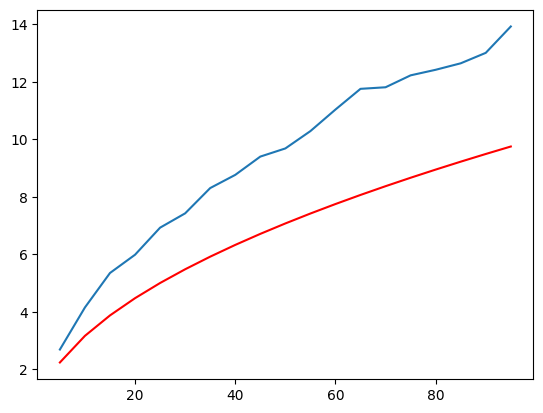

In [30]:
plt.plot(sample_info['n'], sample_info['ratio'])
plt.plot(sample_info['n'], sample_info['n'] ** 0.5, color='r')
plt.show()

From the graph, we can say that

$$ \sqrt{n} < \frac{\sigma_{estimated}}{\sigma_{sampling\_dist}}$$

$$ \sigma_{sampling\_dist} < \frac{\sigma_{estimated}}{\sqrt{n}}$$


$\sigma_{sampling\_dist}$ is called standard error, which is the measure of the distance between in $\mu_{estimated}$ and $\mu$

In practice, we replace < with =

## Back to reality

You somehow manage to get payout for 10 games in a single day

In [31]:
sample = game.run_multiple(n_samples).values
estimated_mean = np.mean(sample)
estimated_mean

np.float64(-14.4)

In [32]:
estimated_std = np.std(sample)

sampling_dist_std = estimated_std / np.sqrt(n_samples)


(estimated_mean - 2 * sampling_dist_std, estimated_mean + 2 * sampling_dist_std)

(np.float64(-19.578416746458323), np.float64(-9.221583253541677))

In [33]:
tests = []
for _ in range(1000):
  sample = game.run_multiple(n_samples).values
  estimated_mean = np.mean(sample)
  estimated_std = np.std(sample)
  sampling_dist_std = estimated_std / np.sqrt(n_samples)

  min_val = estimated_mean - 2 * sampling_dist_std
  max_val = estimated_mean + 2 * sampling_dist_std

  if true_mean >= min_val and true_mean <= max_val:
      tests.append(1)
  else:
      tests.append(0)

np.mean(tests)

np.float64(0.916)

### Confidence Interval:
- Given a sample, we can estimate its mean and std i.e. $ \mu_{estimated}, \sigma_{estimated}$

- Find std of the sampling distribution $\sigma_{sampling\_dist}$

- The true mean $\mu$ lies in below range with 95% probability (or P-value = 0.05 i.e. 100 - 95%),
$$ (\mu_{estimated} - 2*\sigma_{sampling\_dist}, \mu_{estimated} + 2*\sigma_{sampling\_dist})$$



Note: Think of P-value as probability of being wrong

## Activity: Titanic Dataset

We are interested in finding average of all the passenger on the Titanic. However, due to data loss, we have only age information for 100 passengers on the Titantic.

Use confidence intervals to report true mean with P-value 0.05


In [34]:
titanic_sample = titanic_df.sample(100)
titanic_sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.00,1,0,36947,78.2667,D20,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.00,0,0,111428,26.5500,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,NaN,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q


In [35]:
estimated_mean_age = titanic_sample['Age'].mean()
estimated_std_age = titanic_sample['Age'].std()
n_sample = titanic_sample.shape[0]

print(f'Estimated mean: {estimated_mean_age}')
print(f'Estimated std: {estimated_std_age}')
print(f'Sample size: {n_sample}')

Estimated mean: 30.651463414634147
Estimated std: 14.674701176586249
Sample size: 100


In [36]:
sampling_dist_std_age = estimated_std_age / np.sqrt(n_sample)

print(f'Sampling distribution std: {sampling_dist_std_age}')

#Print confidence interval
print(f'Confidence interval: ({estimated_mean_age - 2 * sampling_dist_std_age}, {estimated_mean_age + 2 * sampling_dist_std_age})')

Sampling distribution std: 1.467470117658625
Confidence interval: (27.716523179316898, 33.5864036499514)


In [37]:
print(f"True mean: {titanic_df['Age'].mean()}")

True mean: 29.69911764705882


# Hypothesis Testing

For hypothesis testing, we use all the pieces from method of confidence interval but we flip the question.

Instead of asking what is the true mean and providing confidence interval for it, we assume a true mean based on some hypothesis, calculated confidence interval based on the sample and accept or reject the hypothesis based on whether true mean falls in the confidence interval or not.

We accept or reject by defining P-value i.e. probability of being wrong. If P-value is 0.05, we need to find 100 - 5 i.e. 95% confidence interval

**General Framework for Hypothesis testing:**

Example: Average age of people on Titanic was 20 years

Acceptable p-value = 0.05


1. Define the quantity of interest
  - Mean i.e. $\mu$
2. Identify sampling distribution for the quantity
  - Normal Distribution for Mean
3. Estimate the parameters of the sampling distribution from the sample
  - ($\mu_{estimated}, \sigma_{estimated}, \sigma_{sampling\_dist})$
4. Assume a hypothesis, often called Null Hypothesis
  - $\mu$ = 25
5. Check whether Null Hypothesis can be true based on properties sampling distribtion
  - Calculate 95% confidence interval and check if 20 is present in the confidence interval  
6. Accept or reject hypothesis
  - Rejected, since 20 is not in confidence interval

## t-test

The t-test is used to compare the means of two independent groups to see if they are significantly different.

Quantity of interest:
$$
  t = \frac{\mu_1 - \mu_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}
$$

Null Hypothesis: Both the groups have same mean

### Example: Titanic Dataset - Compare average fare between survivors and non-survivors

Null Hypothesis: Mean fare of survivors = mean fare of non-survivors

In [38]:
from scipy.stats import ttest_ind

# Split into two groups
fare_survived = titanic_df[titanic_df['Survived'] == 1]['Fare']
fare_not_survived = titanic_df[titanic_df['Survived'] == 0]['Fare']

# t-test (Welch’s by default)
t_stat, p = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p)

t-statistic: 6.839099259085254
p-value: 2.6993323503141236e-11


Since p-value < 0.05, we will reject the Null Hypothesis.

**Insight:** The fare changes the probability of survival

## Chi-Squared Test

The Chi-Squared Test checkes whether two categorical variables are statistically independent or if there is a significant association between them

We build a contingency table (cross-tabulation) and compare observed counts with expected counts under the assumption that the variables are independent.

Quantity of interest:
$$
  \chi^2 = \Sigma{\frac{(O - E)^2}{E}}
$$

where O = observed frequency, E = expected frequency (assuming independence)

Null Hypothesis: Both the categorical variables are independent

### Example: Titanic Dataset - Does survival depends on gender?

Null Hypothesis: Gender have no effect on the survival

In [39]:
from scipy.stats import chi2_contingency


# Create contingency table
table = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)


Chi-square statistic: 260.71702016732104
Degrees of freedom: 1
p-value: 1.197357062775565e-58


Since p-value < 0.05, we will reject the Null Hypothesis.

**Insight:** Survival dependents on the gender of the person.

## Activity: Use Chi-Squared test to find out whether Passenger class (PClass column) had any impact on the survival or not

In [40]:
from scipy.stats import chi2_contingency


# Create contingency table
table = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

Chi-square statistic: 102.88898875696056
Degrees of freedom: 2
p-value: 4.549251711298793e-23
